## Dataset pre-processing_Train_Test_Dev_13062022# Preparing the data for modeling

## Subsetting the dataset
 
When our flat-file is ready for modeling we have to procede to generate the partitions that we will use for modeling. No matter which method we will use for training our data, we have to generate first a test dataset. This test dataset has to be set on hold aside and only used at the end of the whole process of training and selecting the best model.
 
After we selected the test dataset we proceed to use the rest of the data for training the models. There are three main strategies for that:
 
* Dividing into train and dev
* Using Cross-validation
* Using Bootstrapping


## Test dataset

In [3]:
data <- read.csv('BGP_FS_10062022.csv')

In [ ]:
#write.csv(data, file="data_11062022.csv")

In [4]:
head(data)

,ID,lng,ChWt_Min_W3,ChWt_Min_W4,ChWt_Min_W5,ChWt_AVG_W1,ChWt_STD_W1,Min_seaLvlPressure_W2,Min_seaLvlPressure_W3,Min_seaLvlPressure_W4,...,Avg_seaLvlPressure_W5,Stm_Max_W4.high,Stm_Max_W5.high,Stm_Min_W1.high,Stm_Min_W5.high,Stm_AVG_W1.high,Stm_AVG_W5.high,Stm_STD_W1.high,Stm_STD_W5.high,El_Nxt_Mnth_Avg_OC
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,1,-75.6972,0,0,0,0.0000000,0.000000,6.912842,6.915525,6.905753,...,6.919005,0,0,0,0,0,0,0,0,4.057455
2,2,-75.6972,0,0,0,0.0000000,0.000000,6.912842,6.915525,6.905753,...,6.919005,0,0,0,0,0,0,0,0,4.696928
3,3,-75.6960,0,0,0,0.0000000,0.000000,6.912842,6.915525,6.905753,...,6.919005,0,0,0,0,0,0,0,0,3.069193
4,4,-75.6972,0,0,0,0.4463035,1.202956,6.912842,6.915525,6.905753,...,6.919005,0,0,0,0,0,0,0,0,5.260250
5,5,-75.6960,0,0,0,0.0000000,0.000000,6.912842,6.915525,6.905753,...,6.919005,0,0,0,0,0,0,0,0,4.046030
6,6,-75.6972,0,0,0,1.6471662,2.420635,6.912842,6.915525,6.905753,...,6.919005,0,0,0,0,0,0,0,0,4.268104


In [5]:
dim(data)

[1] 10272    22

In [4]:
data$Stm_Max_W4.high <- factor(data$Stm_Max_W4.high)
data$Stm_Max_W5.high <- factor(data$Stm_Max_W5.high)
data$Stm_Min_W1.high <- factor(data$Stm_Min_W1.high)
data$Stm_Min_W5.high <- factor(data$Stm_Min_W5.high)
data$Stm_AVG_W1.high <- factor(data$Stm_AVG_W1.high)
data$Stm_AVG_W5.high <- factor(data$Stm_AVG_W5.high)
data$Stm_STD_W1.high <- factor(data$Stm_STD_W1.high)
data$Stm_STD_W5.high <- factor(data$Stm_STD_W5.high)


In [6]:
summary(data)

       ID             lng           ChWt_Min_W3      ChWt_Min_W4    
 Min.   :    1   Min.   :-111.93   Min.   : 0.000   Min.   : 0.000  
 1st Qu.: 2569   1st Qu.: -97.74   1st Qu.: 0.000   1st Qu.: 0.000  
 Median : 5136   Median : -93.26   Median : 2.187   Median : 2.470  
 Mean   : 5136   Mean   : -89.96   Mean   : 2.903   Mean   : 3.034  
 3rd Qu.: 7704   3rd Qu.: -76.49   3rd Qu.: 5.172   3rd Qu.: 5.352  
 Max.   :10272   Max.   : -74.70   Max.   :15.663   Max.   :15.414  
  ChWt_Min_W5      ChWt_AVG_W1      ChWt_STD_W1     Min_seaLvlPressure_W2
 Min.   : 0.000   Min.   : 0.000   Min.   : 0.000   Min.   :6.892        
 1st Qu.: 0.000   1st Qu.: 3.983   1st Qu.: 3.401   1st Qu.:6.911        
 Median : 2.496   Median : 5.750   Median : 4.985   Median :6.917        
 Mean   : 2.983   Mean   : 5.644   Mean   : 4.944   Mean   :6.916        
 3rd Qu.: 5.198   3rd Qu.: 7.112   3rd Qu.: 6.068   3rd Qu.:6.920        
 Max.   :15.705   Max.   :15.763   Max.   :14.236   Max.   :6.933        

In [7]:
vn <- setdiff(names(data),c("ID"))
vn


[1] "lng"                   "ChWt_Min_W3"           "ChWt_Min_W4"          
 [4] "ChWt_Min_W5"           "ChWt_AVG_W1"           "ChWt_STD_W1"          
 [7] "Min_seaLvlPressure_W2" "Min_seaLvlPressure_W3" "Min_seaLvlPressure_W4"
[10] "Min_seaLvlPressure_W5" "Avg_seaLvlPressure_W4" "Avg_seaLvlPressure_W5"
[13] "Stm_Max_W4.high"       "Stm_Max_W5.high"       "Stm_Min_W1.high"      
[16] "Stm_Min_W5.high"       "Stm_AVG_W1.high"       "Stm_AVG_W5.high"      
[19] "Stm_STD_W1.high"       "Stm_STD_W5.high"       "El_Nxt_Mnth_Avg_OC"

In [8]:
#library(devtools)
#install_github("karpatit/mechkar")
#require(mechkar)
source("mechkar.r")

In [9]:
tab1 <- Table1(data = data,x = vn,y = "Stm_STD_W5.high")

  |======================================================================| 100%

In [11]:
colnames(tab1)[6]<-'pval'


In [12]:
tab1

,Variables,,Population,0,1,pval
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Avg_seaLvlPressure_W4,Mean (SD),6.9 (0.0),6.9 (0.0),6.9 (0.0),
2,Avg_seaLvlPressure_W4,Median (IQR),6.9 (6.9-6.9),6.9 (6.9-6.9),6.9 (6.9-6.9),<0.001
3,Avg_seaLvlPressure_W5,Mean (SD),6.9 (0.0),6.9 (0.0),6.9 (0.0),
4,Avg_seaLvlPressure_W5,Median (IQR),6.9 (6.9-6.9),6.9 (6.9-6.9),6.9 (6.9-6.9),<0.001
5,ChWt_AVG_W1,Mean (SD),5.6 (3.3),5.6 (3.2),5.6 (4.3),
6,ChWt_AVG_W1,Median (IQR),5.7 (4.0-7.1),5.8 (4.1-7.1),5.4 (2.3-8.0),0.979
7,ChWt_Min_W3,Mean (SD),2.9 (3.1),2.9 (3.1),2.9 (3.7),
8,ChWt_Min_W3,Median (IQR),2.2 (0.0-5.2),2.3 (0.0-5.2),1.3 (0.0-5.0),0.93
9,ChWt_Min_W4,Mean (SD),3.0 (3.3),3.0 (3.2),3.4 (3.8),


In [16]:
############### TRAIN_TEST #######################
train_test <- function(data=NULL,train_name=NULL,test_name=NULL,prop=NULL,seed=1,tableone=FALSE)
{ 
    pval <- NULL
  checkTrainTest <- function(train=NULL,test=NULL) {
     train[["traintest_ind_"]] <- 1
     test[["traintest_ind_"]] <- 2
     data <- rbind(train, test)
     tab <- Table1(data=data, y="traintest_ind_",x=names(train),messages = F)
     vars <- subset(tab, pval < 0.1)$V1
     if (length(vars)==1) {
        message("You got a perfectly balanced training and test datasets")
        message(" ")
     } else {
        message("WARNING: The following variables are not balanced between the training and test datasets:")
       for (v in vars) {  message(paste("*",v))  }
          message("You can try to change the seed value until you get a balanced partition.")
          message("Alternatively, you can ommit this warning and exclude those variables from your model")
          message(" ")
       }
       return(tab)
  }
  ## set the seed to make your partition reproductible
  set.seed(seed)
  smp_size <- floor(prop * nrow(data))
  train_ind <- sample(seq_len(nrow(data)), size = smp_size)
  assign(train_name, data[train_ind, ], envir=globalenv())
  assign(test_name, data[-train_ind, ], envir=globalenv())
  tab = checkTrainTest(get(train_name),get(test_name))
  message(paste("Dataset partitioned into:"))
  message(paste(" + Train dataset:", train_name))
  message(paste(" + Test dataset:", test_name))
  if(tableone==TRUE) {
     return(tab)
  } 
}


## Test dataset

In [45]:
tab1 <- train_test(data = data[,vn], train_name = "temp", test_name = "test",prop = 0.8, seed = 19, tableone=F)

  |======================================================================| 100%


You can try to change the seed value until you get a balanced partition.

Alternatively, you can ommit this warning and exclude those variables from your model

 

Dataset partitioned into:

 + Train dataset: temp

 + Test dataset: test



In [46]:
tab1

NULL

In [47]:
dim(temp)
dim(test)

[1] 8217   21

[1] 2055   21

In [48]:
temp

,lng,ChWt_Min_W3,ChWt_Min_W4,ChWt_Min_W5,ChWt_AVG_W1,ChWt_STD_W1,Min_seaLvlPressure_W2,Min_seaLvlPressure_W3,Min_seaLvlPressure_W4,Min_seaLvlPressure_W5,...,Avg_seaLvlPressure_W5,Stm_Max_W4.high,Stm_Max_W5.high,Stm_Min_W1.high,Stm_Min_W5.high,Stm_AVG_W1.high,Stm_AVG_W5.high,Stm_STD_W1.high,Stm_STD_W5.high,El_Nxt_Mnth_Avg_OC
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
7677,-74.70000,4.780277,4.888043,5.710857,5.490536,4.906688,6.913240,6.920079,6.918893,6.921954,...,6.924961,0,0,0,0,0,0,0,0,5.056964
9910,-111.92814,0.000000,0.000000,0.000000,6.654466,6.449148,6.913141,6.913936,6.913638,6.918893,...,6.922738,0,0,0,0,0,0,0,0,2.950513
4483,-76.48529,2.982748,3.574077,4.904965,5.748845,5.190721,6.915128,6.918893,6.918596,6.920573,...,6.924338,0,0,0,0,0,0,0,0,5.074206
7557,-81.37904,0.000000,3.248097,3.248097,5.161737,4.734006,6.921362,6.921757,6.919091,6.920375,...,6.924096,0,0,0,0,0,0,0,0,2.036789
2745,-76.48529,4.242062,4.575626,4.526143,4.028224,2.995754,6.907355,6.905553,6.896087,6.905052,...,6.911593,0,0,0,0,0,0,0,0,6.546848
4803,-93.25540,5.509716,6.027436,5.410059,6.952169,6.397475,6.908555,6.915029,6.915823,6.922939,...,6.924697,0,0,0,0,0,0,0,0,2.757656
5677,-93.25540,4.199029,4.106973,2.983103,5.306891,4.872378,6.911747,6.913439,6.913340,6.922151,...,6.925175,0,0,0,0,0,0,0,0,5.489663
10255,-97.74310,7.502572,7.699669,4.919473,7.693074,5.555519,6.919387,6.920277,6.918695,6.924612,...,6.927715,0,0,0,0,0,0,0,0,3.761563
2685,-97.74310,6.339434,0.000000,6.649832,5.696793,4.651368,6.918695,6.918003,6.910551,6.922151,...,6.925214,0,0,0,0,0,0,0,0,3.504075


In [50]:
write.csv(temp, file="temp_train_11062022.csv")

In [49]:
test

,lng,ChWt_Min_W3,ChWt_Min_W4,ChWt_Min_W5,ChWt_AVG_W1,ChWt_STD_W1,Min_seaLvlPressure_W2,Min_seaLvlPressure_W3,Min_seaLvlPressure_W4,Min_seaLvlPressure_W5,...,Avg_seaLvlPressure_W5,Stm_Max_W4.high,Stm_Max_W5.high,Stm_Min_W1.high,Stm_Min_W5.high,Stm_AVG_W1.high,Stm_AVG_W5.high,Stm_STD_W1.high,Stm_STD_W5.high,El_Nxt_Mnth_Avg_OC
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
15,-75.6972,0.000000,0.000000,0.000000,1.130171,2.110233,6.912842,6.915525,6.905753,6.916021,...,6.919005,0,0,0,0,0,0,0,0,4.350355
16,-75.6960,0.000000,0.000000,0.000000,0.000000,0.000000,6.912842,6.915525,6.905753,6.916021,...,6.919005,0,0,0,0,0,0,0,0,2.881710
25,-74.7000,4.746037,4.263083,4.312055,6.426364,5.946383,6.912842,6.915525,6.905753,6.916021,...,6.919005,0,0,0,0,0,0,0,0,3.411631
26,-75.6960,0.000000,0.000000,0.000000,0.000000,0.000000,6.912842,6.915525,6.905753,6.916021,...,6.919005,0,0,0,0,0,0,0,0,3.750666
27,-74.7000,4.746037,4.263083,4.312055,6.426364,5.946383,6.912842,6.915525,6.905753,6.916021,...,6.919005,0,0,0,0,0,0,0,0,3.411631
35,-97.7431,7.749075,7.728168,7.911622,7.978909,7.161285,6.918695,6.916913,6.909454,6.909254,...,6.913588,0,0,0,0,0,0,0,0,6.375366
38,-97.7431,5.563970,5.630904,5.755019,5.886290,5.218613,6.918695,6.916913,6.909454,6.909254,...,6.913588,0,0,0,0,0,0,0,0,3.774313
41,-97.7431,6.079322,5.974939,6.172026,6.597400,6.395672,6.918695,6.916913,6.909454,6.909254,...,6.913588,0,0,0,0,0,0,0,0,4.858941
45,-97.7431,7.663735,7.765995,7.846307,7.930936,6.946824,6.918695,6.916913,6.909454,6.909254,...,6.913588,0,0,0,0,0,0,0,0,6.095678


In [51]:
write.csv(test, file="test_train_11062022.csv")

In [187]:
filter(tab1,pval < 0.05)

ERROR: Error in ts(x): 'ts' object must have one or more observations


## Train and Dev

In [54]:
tab2 <- train_test(data = temp[,vn], train_name = "train", test_name = "dev",prop = 0.8, seed = 2, tableone=T)

  |======================================================================| 100%


You can try to change the seed value until you get a balanced partition.

Alternatively, you can ommit this warning and exclude those variables from your model

 

Dataset partitioned into:

 + Train dataset: train

 + Test dataset: dev



In [55]:
dim(train)
dim(dev)

[1] 6573   21

[1] 1644   21

In [57]:
colnames(tab2)[6]<-'pval'

In [21]:
tab2$pval

[1] ""      "0.656" ""      "0.623" ""      "0.417" ""      "0.682" ""     
[10] "0.908" ""      "0.908" ""      "0.376" ""      "0.97"  ""      ""     
[19] "0.402" ""      "0.53"  ""      "0.66"  ""      "0.333" ""      "0.644"
[28] "0.844" "0.647" "0.488" "0.95"  "0.26"  "0.656" "0.622" "0.69"

In [58]:
tab2

,Variables,,Population,1,2,pval
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Avg_seaLvlPressure_W4,Mean (SD),6.9 (0.0),6.9 (0.0),6.9 (0.0),
2,Avg_seaLvlPressure_W4,Median (IQR),6.9 (6.9-6.9),6.9 (6.9-6.9),6.9 (6.9-6.9),0.304
3,Avg_seaLvlPressure_W5,Mean (SD),6.9 (0.0),6.9 (0.0),6.9 (0.0),
4,Avg_seaLvlPressure_W5,Median (IQR),6.9 (6.9-6.9),6.9 (6.9-6.9),6.9 (6.9-6.9),0.411
5,ChWt_AVG_W1,Mean (SD),5.6 (3.3),5.6 (3.3),5.6 (3.3),
6,ChWt_AVG_W1,Median (IQR),5.8 (4.0-7.1),5.8 (4.0-7.1),5.7 (4.0-7.1),0.775
7,ChWt_Min_W3,Mean (SD),2.9 (3.2),2.9 (3.2),2.8 (3.1),
8,ChWt_Min_W3,Median (IQR),2.1 (0.0-5.2),2.2 (0.0-5.2),1.7 (0.0-5.1),0.036
9,ChWt_Min_W4,Mean (SD),3.0 (3.3),3.0 (3.3),2.9 (3.2),


In [22]:
filter(tab2, tab2$pval < 0.05)

1,NA,NA,NA,NA,NA,NA
2,NA,NA,NA,NA,NA,NA
3,NA,NA,NA,NA,NA,NA
4,NA,NA,NA,NA,NA,NA
5,NA,NA,NA,NA,NA,NA
6,NA,NA,NA,NA,NA,NA
7,NA,NA,NA,NA,NA,NA
8,NA,NA,NA,NA,NA,NA
9,NA,NA,NA,NA,NA,NA
10,NA,NA,NA,NA,NA,NA
11,NA,NA,NA,NA,NA,NA


In [22]:
### save memeory, remove the datasets that will not be used more...
rm(temp,data)

Checking the distribution of the outcome on the three subsets

In [2]:
#install.packages("ggplot2",   repos = c("http://rstudio.org/_packages",   "http://cran.rstudio.com"))
#install.packages("rlang")
require(ggplot2)
#packageVersion("rlang")
#library(ggplot2)
#install.packages("https://cran.r-project.org/src/contrib/Archive/rlang/rlang_4.1.2.tar.gz", repos = NULL, type="source")

#options(repr.plot.width = 10, repr.plot.height = 8)

#ggplot() +
#    geom_density(aes(x=train$El_Nxt_Mnth_Avg_OC),color="red",alpha=0.3) +
#    geom_density(aes(x=dev$El_Nxt_Mnth_Avg_OC),color="blue",alpha=0.3) +
#    geom_density(aes(x=test$El_Nxt_Mnth_Avg_OC),color="green",alpha=0.3)
#library(ggplot2)

#ggplot(data=temp,aes(x=temp$El_Nxt_Mnth_Avg_OC)) +
# geom_density()




Loading required package: ggplot2

Warning message:
"package 'ggplot2' was built under R version 4.1.3"
Error: package or namespace load failed for 'ggplot2' in loadNamespace(i, c(lib.loc, .libPaths()), versionCheck = vI[[i]]):
 namespace 'rlang' 0.4.12 is already loaded, but >= 1.0.0 is required



# Train-Dev

In [59]:
library(ranger)

mod1 <- ranger(El_Nxt_Mnth_Avg_OC ~., data=train)


In [60]:
mod1

Ranger result

Call:
 ranger(El_Nxt_Mnth_Avg_OC ~ ., data = train) 

Type:                             Regression 
Number of trees:                  500 
Sample size:                      6573 
Number of independent variables:  20 
Mtry:                             4 
Target node size:                 5 
Variable importance mode:         none 
Splitrule:                        variance 
OOB prediction error (MSE):       0.576031 
R squared (OOB):                  0.6370459 

In [61]:
pred1 <- predict(mod1, data=test)


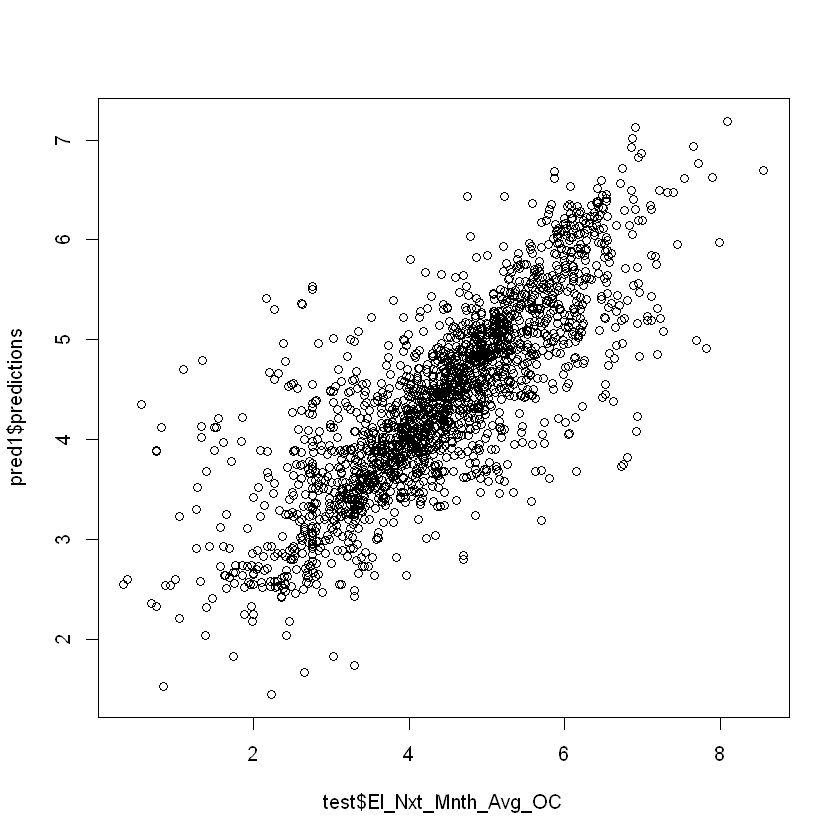

In [63]:
plot(pred1$predictions ~ test$El_Nxt_Mnth_Avg_OC)

# Cross-Validation

<img src="https://genome.tugraz.at/proclassify/help/pages/images/xv_folds.gif"/>


In [16]:
library(caret)
# load the iris dataset
data(iris)

Warning message:
"package 'caret' was built under R version 4.0.4"
Loading required package: lattice



In [18]:
set.seed(2)
seeds <- vector(mode = "list", length = 51)
for(i in 1:50) seeds[[i]] <- sample.int(1000, 22)

## For the last model:
seeds[[51]] <- sample.int(1000, 1)

# define training control
trControl <- caret::trainControl(method = "repeatedcv", repeats = 5, seeds = seeds)
# train the model
model <- train(Species~., data=iris, trControl=trControl, method="ctree")

In [19]:
# summarize results
print(model)

Conditional Inference Tree 

150 samples
  4 predictor
  3 classes: 'setosa', 'versicolor', 'virginica' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 135, 135, 135, 135, 135, 135, ... 
Resampling results across tuning parameters:

  mincriterion  Accuracy  Kappa
  0.01          0.94      0.91 
  0.50          0.94      0.91 
  0.99          0.94      0.91 

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mincriterion = 0.99.


# Leave-one-out Cross Validation

In [20]:
# define training control
train_control <- trainControl(method="LOOCV")
# train the model
model <- train(Species~., data=iris, trControl=train_control, method="ctree")

In [21]:
# summarize results
print(model)

Conditional Inference Tree 

150 samples
  4 predictor
  3 classes: 'setosa', 'versicolor', 'virginica' 

No pre-processing
Resampling: Leave-One-Out Cross-Validation 
Summary of sample sizes: 149, 149, 149, 149, 149, 149, ... 
Resampling results across tuning parameters:

  mincriterion  Accuracy   Kappa
  0.01          0.9333333  0.9  
  0.50          0.9333333  0.9  
  0.99          0.9333333  0.9  

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mincriterion = 0.99.


In [116]:
?caret::trainControl

In [117]:
?carer::train

ERROR: Error in find.package(if (is.null(package)) loadedNamespaces() else package, : there is no package called 'carer'


# Boostrapping



In [22]:
# define training control
train_control <- trainControl(method="boot", number=100)
# train the model
model <- train(Species~., data=iris, trControl=train_control,method="ctree")

In [23]:
# summarize results
print(model)

Conditional Inference Tree 

150 samples
  4 predictor
  3 classes: 'setosa', 'versicolor', 'virginica' 

No pre-processing
Resampling: Bootstrapped (100 reps) 
Summary of sample sizes: 150, 150, 150, 150, 150, 150, ... 
Resampling results across tuning parameters:

  mincriterion  Accuracy   Kappa    
  0.01          0.9393788  0.9080796
  0.50          0.9393788  0.9080796
  0.99          0.9393788  0.9080796

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mincriterion = 0.99.


# Dataset Inbalance

In [64]:
if(!require(imbalance)){install.packages("imbalance");require(imbalance)}
### ROSE = Random Over-Sampling Examples
if(!require(ROSE)){install.packages("ROSE");require(ROSE)} ## ROSE = SMOTE METHOD


Loading required package: imbalance

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
"there is no package called 'imbalance'"
also installing the dependencies 'Cubist', 'bnlearn', 'KernelKnn', 'smotefamily', 'FNN', 'C50'




package 'Cubist' successfully unpacked and MD5 sums checked
package 'bnlearn' successfully unpacked and MD5 sums checked
package 'KernelKnn' successfully unpacked and MD5 sums checked
package 'smotefamily' successfully unpacked and MD5 sums checked
package 'FNN' successfully unpacked and MD5 sums checked
package 'C50' successfully unpacked and MD5 sums checked
package 'imbalance' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\שם גולסט\AppData\Local\Temp\Rtmp8qgUEN\downloaded_packages


Loading required package: imbalance

Warning message:
"package 'imbalance' was built under R version 4.1.3"
Loading required package: ROSE

Loaded ROSE 0.0-4




In [25]:
data(newthyroid1)
head(newthyroid1)

,T3resin,Thyroxin,Triiodothyronine,Thyroidstimulating,TSH_value,Class
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,105,7.3,1.5,1.5,-0.1,negative
2,67,23.3,7.4,1.8,-0.6,positive
3,111,8.4,1.5,0.8,1.2,negative
4,89,14.3,4.1,0.5,0.2,positive
5,105,9.5,1.8,1.6,3.6,negative
6,110,20.3,3.7,0.6,0.2,positive


In [26]:
table(newthyroid1$Class)
table(newthyroid1$Class)/nrow(newthyroid1)*100


negative positive 
     180       35 


negative positive 
83.72093 16.27907 

In [27]:
numPositive <- length(which(newthyroid1$Class == "positive"))
numNegative <- length(which(newthyroid1$Class == "negative"))
nInstances <- numNegative - numPositive
cbind(numPositive=numPositive,numNegative=numNegative,nInstances=nInstances)

numPositive,numNegative,nInstances
35,180,145


## Under Sampling
 
This techniques uses all the rows containing the minority class and select randomly the same number of minority class for the rows with the mayority class 

In [30]:
data_balanced_under <- ovun.sample(Class ~ ., data = newthyroid1, method = "under",N = numPositive*2, seed = 1)$data
table(data_balanced_under$Class)


negative positive 
      35       35 

## Over Sampling
 
Over sampling takes the number of rows of the mayority class and repeat the rows of the minority class up to the same number of the mayority class. The repeated rows are selected randomly.

In [31]:
#over sampling
data_balanced_over <- ovun.sample(Class ~ ., data = newthyroid1, method = "over",N = numNegative*2, seed = 1)$data
table(data_balanced_over$Class)


negative positive 
     180      180 

## Over-Under Sampling
 
In this technique we randomly select half of the majority class rows (under sampling) and increment the minority class rows by selecting them randomly.   

In [32]:
#over_under sampling
data_balanced_both <- ovun.sample(Class ~ ., data = newthyroid1, method = "both", p=0.5,N = 180, seed = 1)$data
table(data_balanced_both$Class)


negative positive 
      90       90 

## ROSE (Random Over-Sampling Examples) 
 
Creates a sample of synthetic data by enlarging the features space of minority and majority class examples. ROSE selects an observation belonging to the class k and generates new examples in its neighbourhood

In [33]:
# Rose: 
data.rose <- ROSE(Class ~ ., data = newthyroid1, seed = 1)$data
table(data.rose$Class)


negative positive 
     105      110 

## Oversampling with Synthetic data
 
Additionally to ROSE. The package 'inbalance' has the function pdfos. This function generates synthetic minority examples for a numerical dataset approximating a Gaussian multivariate distribution.


In [26]:
newSamples <- pdfos(dataset = newthyroid1, numInstances = nInstances,classAttr = "Class")
newDataset <- rbind(newthyroid1, newSamples)
table(newDataset$Class)


negative positive 
     180      180 

# Clustering method 

In [35]:
library(dplyr)

Warning message:
"package 'dplyr' was built under R version 4.0.2"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [34]:
df <- read.table(unz("creditcard.csv.zip", "creditcard.csv"), header=T, quote="\"", sep=",")

In [36]:
summary(df)
table(df$Class)

      Time              V1                  V2                  V3          
 Min.   :     0   Min.   :-56.40751   Min.   :-72.71573   Min.   :-48.3256  
 1st Qu.: 54202   1st Qu.: -0.92037   1st Qu.: -0.59855   1st Qu.: -0.8904  
 Median : 84692   Median :  0.01811   Median :  0.06549   Median :  0.1799  
 Mean   : 94814   Mean   :  0.00000   Mean   :  0.00000   Mean   :  0.0000  
 3rd Qu.:139321   3rd Qu.:  1.31564   3rd Qu.:  0.80372   3rd Qu.:  1.0272  
 Max.   :172792   Max.   :  2.45493   Max.   : 22.05773   Max.   :  9.3826  
       V4                 V5                   V6                 V7          
 Min.   :-5.68317   Min.   :-113.74331   Min.   :-26.1605   Min.   :-43.5572  
 1st Qu.:-0.84864   1st Qu.:  -0.69160   1st Qu.: -0.7683   1st Qu.: -0.5541  
 Median :-0.01985   Median :  -0.05434   Median : -0.2742   Median :  0.0401  
 Mean   : 0.00000   Mean   :   0.00000   Mean   :  0.0000   Mean   :  0.0000  
 3rd Qu.: 0.74334   3rd Qu.:   0.61193   3rd Qu.:  0.3986   3rd Qu


     0      1 
284315    492 

In [37]:
### divide into train-test
# seed   vars
# 2      V22

mechkar::train_test(data=df, train_name="train", test_name="test", prop=0.7, seed=2, tableone=T)

Dataset partitioned into:

 + Train dataset: train

 + Test dataset: test

Warning message in Table1(data = df, y = "traintest_ind_", messages = FALSE):
"The following variables have unique values and will not be included in the analysis: "


  |====================================================================  |  97%


* V22

You can try to change the seed value until you get a balanced partition.

Alternatively, you can ommit this warning and exclude those variables from your model

 



V1,V2,Pop,1,2,pval
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Individuals,n,284807,199364,85443,NA
Time,Mean (SD),"94,813.9 (47,488.1)","94,848.0 (47,454.6)","94,734.2 (47,566.6)",NA
Time,Median (IQR),"84,692.0 (54,201.5-139,320.5)","84,703.5 (54,272.0-139,287.0)","84,672.0 (54,046.5-139,396.5)",0.558
V1,Mean (SD),0.0 (2.0),0.0 (2.0),0.0 (2.0),NA
V1,Median (IQR),0.0 (-0.9-1.3),0.0 (-0.9-1.3),0.0 (-0.9-1.3),0.471
V2,Mean (SD),0.0 (1.7),0.0 (1.6),0.0 (1.7),NA
V2,Median (IQR),0.1 (-0.6-0.8),0.1 (-0.6-0.8),0.1 (-0.6-0.8),0.926
V3,Mean (SD),0.0 (1.5),0.0 (1.5),0.0 (1.5),NA
V3,Median (IQR),0.2 (-0.9-1.0),0.2 (-0.9-1.0),0.2 (-0.9-1.0),0.939


In [38]:
table(train$Class)
table(train$Class)/nrow(train)

table(test$Class)
table(test$Class)/nrow(test)


     0      1 
199017    347 


          0           1 
0.998259465 0.001740535 


    0     1 
85298   145 


          0           1 
0.998302962 0.001697038 

#### Base Models

In [40]:
bm <- glm(Class ~., data=train, family="binomial")
summary(bm)


Call:
glm(formula = Class ~ ., family = "binomial", data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.6572  -0.0281  -0.0181  -0.0114   4.5974  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -8.844e+00  3.199e-01 -27.643  < 2e-16 ***
Time        -5.161e-07  2.724e-06  -0.189   0.8497    
V1           8.079e-02  5.270e-02   1.533   0.1253    
V2           8.302e-02  8.437e-02   0.984   0.3252    
V3           3.351e-02  6.737e-02   0.497   0.6190    
V4           7.065e-01  9.737e-02   7.256 3.99e-13 ***
V5           1.178e-01  8.975e-02   1.312   0.1894    
V6          -1.546e-01  9.641e-02  -1.604   0.1088    
V7          -1.467e-01  8.872e-02  -1.654   0.0981 .  
V8          -1.872e-01  3.947e-02  -4.741 2.12e-06 ***
V9          -1.133e-01  1.423e-01  -0.796   0.4258    
V10         -7.392e-01  1.226e-01  -6.030 1.64e-09 ***
V11          2.101e-02  9.934e-02   0.212   0.8325    
V12          1.257e-01  1.055e-01 

In [41]:
predbm <- predict(bm,newdata=test,type="response")

In [42]:
### AUC
roc0 <- pROC::roc(test$Class, predbm)
roc0

Setting levels: control = 0, case = 1

Setting direction: controls < cases




Call:
roc.default(response = test$Class, predictor = predbm)

Data: predbm in 85298 controls (test$Class 0) < 145 cases (test$Class 1).
Area under the curve: 0.9757

In [43]:
table(obs=test$Class, pred=ifelse(predbm>0.5,1,0))

   pred
obs     0     1
  0 85287    11
  1    65    80

In [59]:
numPositive <- length(which(train$Class == 1))
numNegative <- length(which(train$Class == 0))
nInstances <- numNegative - numPositive
cbind(numPositive=numPositive,numNegative=numNegative,nInstances=nInstances)

numPositive,numNegative,nInstances
347,199017,198670


In [61]:
## Under Sampling

data_balanced_under <- ovun.sample(Class ~ ., data = train, method = "under",N = numPositive*2, seed = 1)$data
table(data_balanced_under$Class)

## Over Sampling
 
#over sampling
data_balanced_over <- ovun.sample(Class ~ ., data = train, method = "over",N = numNegative*2, seed = 1)$data
table(data_balanced_over$Class)

## Over-Under Sampling

#over_under sampling
data_balanced_both <- ovun.sample(Class ~ ., data = train, method = "both", p=0.5,N = nrow(train), seed = 1)$data
table(data_balanced_both$Class)

## ROSE (Random Over-Sampling Examples) 

# Rose: 
data.rose <- ROSE(Class ~ ., data = train, seed = 1)$data
table(data.rose$Class)


  0   1 
347 347 


     0      1 
199017 199017 


    0     1 
99526 99838 


    0     1 
99526 99838 

In [62]:
# data_balanced_under 
bm <- glm(Class ~., data=data_balanced_under, family="binomial")
summary(bm)

predbm <- predict(bm,newdata=test,type="response")

### AUC
roc0 <- pROC::roc(test$Class, predbm)
roc0

Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Call:
glm(formula = Class ~ ., family = "binomial", data = data_balanced_under)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6518  -0.1471   0.0000   0.0000   3.3087  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)  
(Intercept) -2.472e+01  1.968e+02  -0.126   0.9001  
Time        -1.871e-05  9.899e-06  -1.890   0.0587 .
V1          -8.155e+00  4.337e+01  -0.188   0.8508  
V2           5.545e+01  2.900e+02   0.191   0.8484  
V3          -4.921e+01  1.135e+02  -0.434   0.6645  
V4           3.372e+01  9.208e+01   0.366   0.7142  
V5          -2.077e+01  1.588e+01  -1.308   0.1907  
V6          -2.681e+01  1.319e+02  -0.203   0.8390  
V7          -1.081e+02  4.546e+02  -0.238   0.8120  
V8           1.977e+01  7.721e+01   0.256   0.7979  
V9          -4.166e+01  1.390e+02  -0.300   0.7644  
V10         -9.626e+01  3.196e+02  -0.301   0.7633  
V11          7.343e+01  2.710e+02   0.271   0.7865  
V12         -1.326e+02  4.868e+02  -0.272   0.78

Setting levels: control = 0, case = 1

Setting direction: controls < cases




Call:
roc.default(response = test$Class, predictor = predbm)

Data: predbm in 85298 controls (test$Class 0) < 145 cases (test$Class 1).
Area under the curve: 0.9823

In [63]:
# data_balanced_over
bm <- glm(Class ~., data=data_balanced_over, family="binomial")
summary(bm)

predbm <- predict(bm,newdata=test,type="response")

### AUC
roc0 <- pROC::roc(test$Class, predbm)
roc0

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Call:
glm(formula = Class ~ ., family = "binomial", data = data_balanced_over)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-8.490  -0.242   0.000   0.000   2.883  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.502e+00  4.227e-02 -82.833  < 2e-16 ***
Time        -6.210e-06  2.650e-07 -23.433  < 2e-16 ***
V1           5.370e-01  1.704e-02  31.519  < 2e-16 ***
V2           2.890e-01  3.520e-02   8.209 2.22e-16 ***
V3           1.551e-01  1.484e-02  10.449  < 2e-16 ***
V4           7.683e-01  1.051e-02  73.107  < 2e-16 ***
V5           5.125e-01  2.323e-02  22.060  < 2e-16 ***
V6          -3.792e-01  1.559e-02 -24.319  < 2e-16 ***
V7          -3.587e-01  2.889e-02 -12.417  < 2e-16 ***
V8          -5.058e-01  1.202e-02 -42.076  < 2e-16 ***
V9          -1.394e-01  1.178e-02 -11.840  < 2e-16 ***
V10         -5.195e-01  1.679e-02 -30.937  < 2e-16 ***
V11          4.727e-01  1.163e-02  40.632  < 2e-16 ***
V12         -1.021e+00  1.616e-

Setting levels: control = 0, case = 1

Setting direction: controls < cases




Call:
roc.default(response = test$Class, predictor = predbm)

Data: predbm in 85298 controls (test$Class 0) < 145 cases (test$Class 1).
Area under the curve: 0.9782

In [64]:
# data_balanced_both
bm <- glm(Class ~., data=data_balanced_both, family="binomial")
summary(bm)

predbm <- predict(bm,newdata=test,type="response")

### AUC
roc0 <- pROC::roc(test$Class, predbm)
roc0

Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Call:
glm(formula = Class ~ ., family = "binomial", data = data_balanced_both)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-8.4904  -0.2359   0.0000   0.0000   2.9740  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.529e+00  6.512e-02 -54.190  < 2e-16 ***
Time        -6.039e-06  3.769e-07 -16.022  < 2e-16 ***
V1           5.380e-01  2.716e-02  19.807  < 2e-16 ***
V2           2.579e-01  5.710e-02   4.517 6.29e-06 ***
V3           1.459e-01  2.364e-02   6.173 6.70e-10 ***
V4           7.876e-01  1.612e-02  48.860  < 2e-16 ***
V5           5.048e-01  3.764e-02  13.411  < 2e-16 ***
V6          -3.681e-01  2.440e-02 -15.085  < 2e-16 ***
V7          -3.318e-01  4.695e-02  -7.068 1.57e-12 ***
V8          -5.326e-01  1.828e-02 -29.134  < 2e-16 ***
V9          -1.723e-01  1.706e-02 -10.100  < 2e-16 ***
V10         -5.487e-01  2.490e-02 -22.038  < 2e-16 ***
V11          4.873e-01  1.677e-02  29.062  < 2e-16 ***
V12         -1.075e+0

Setting levels: control = 0, case = 1

Setting direction: controls < cases




Call:
roc.default(response = test$Class, predictor = predbm)

Data: predbm in 85298 controls (test$Class 0) < 145 cases (test$Class 1).
Area under the curve: 0.9784

In [65]:
# data.rose
bm <- glm(Class ~., data=data.rose, family="binomial")
summary(bm)

predbm <- predict(bm,newdata=test,type="response")

### AUC
roc0 <- pROC::roc(test$Class, predbm)
roc0

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Call:
glm(formula = Class ~ ., family = "binomial", data = data.rose)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-6.1421  -0.3930   0.0000   0.0226   4.5485  

Coefficients:
              Estimate Std. Error  z value Pr(>|z|)    
(Intercept) -2.448e+00  2.026e-02 -120.855  < 2e-16 ***
Time        -8.795e-07  1.721e-07   -5.110 3.23e-07 ***
V1          -2.989e-02  2.613e-03  -11.437  < 2e-16 ***
V2           8.656e-02  3.803e-03   22.759  < 2e-16 ***
V3          -7.858e-02  2.771e-03  -28.355  < 2e-16 ***
V4           4.633e-01  4.773e-03   97.062  < 2e-16 ***
V5           1.854e-02  3.407e-03    5.443 5.24e-08 ***
V6          -1.567e-01  5.908e-03  -26.522  < 2e-16 ***
V7          -4.950e-02  2.822e-03  -17.540  < 2e-16 ***
V8          -7.019e-02  2.737e-03  -25.650  < 2e-16 ***
V9          -1.052e-01  5.929e-03  -17.751  < 2e-16 ***
V10         -1.650e-01  3.972e-03  -41.533  < 2e-16 ***
V11          3.072e-01  5.770e-03   53.249  < 2e-16 ***
V12         -2.4

Setting levels: control = 0, case = 1

Setting direction: controls < cases




Call:
roc.default(response = test$Class, predictor = predbm)

Data: predbm in 85298 controls (test$Class 0) < 145 cases (test$Class 1).
Area under the curve: 0.9816

In [44]:
table(train$Class)


     0      1 
199017    347 

In [45]:
tr1 <- train %>% filter(Class==0)
nrow(tr1)

[1] 199017

In [46]:
#### k-means with 347 clusters
kmod <- kmeans(tr1[,1:31],centers = 347)
table(kmod$cluster)

Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 9950850)"



   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
 638  680  606  569  564  667  719  697  854  603   64  665  718   10  548  562 
  17   18   19   20   21   22   23   24   25   26   27   28   29   30   31   32 
 462  529  722  659  557  731  837   36  560  494  599  631  689  501  671  643 
  33   34   35   36   37   38   39   40   41   42   43   44   45   46   47   48 
 766   20   49  655   15  450  480  787  637  455  777  564  763  743   76  639 
  49   50   51   52   53   54   55   56   57   58   59   60   61   62   63   64 
  21  644  581  751  508  733   39  528  725  596  497   21  614    1  690  768 
  65   66   67   68   69   70   71   72   73   74   75   76   77   78   79   80 
 459  622  580  740  697  732  766  756  415  736  554   77  635  791   11  517 
  81   82   83   84   85   86   87   88   89   90   91   92   93   94   95   96 
 823  712  594   57  698   53  728  582  863  650  557  618  633  819  955  540 
  97   98   99  100  101  1

In [47]:
kmod$centers

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
1,39078.98,-0.31072050,0.055269695,0.6570110,0.14851188,-0.3332589,0.091361135,-0.14748340,0.1698362017,-0.185888866,...,-0.040245353,-0.114517527,-0.017870047,0.015648685,0.14129757,0.022950988,0.0318932449,0.017862161,89.22155,0
2,55083.77,-0.17113758,-0.138812799,0.6288612,0.05875734,-0.3153015,0.084576051,-0.17078124,-0.0270790287,-0.280087909,...,-0.050822069,-0.091037768,-0.005035985,0.046395852,0.12723720,0.079935954,0.0174419812,0.006210841,97.67660,0
3,139948.61,0.10196330,0.010077426,-0.7591726,-0.27668039,0.4322285,-0.184839351,0.03340623,-0.1208256000,-0.025929789,...,0.088749916,0.126872182,0.063624352,-0.041850568,-0.14057149,-0.016632957,0.0091200572,-0.009199069,65.06853,0
4,127080.78,0.34076808,-0.273547924,-0.6189680,-0.20489040,0.3227942,-0.094358138,0.05008764,-0.0560680100,0.003416217,...,0.016773010,0.160344952,0.062956105,-0.054157136,-0.15094602,-0.046088862,0.0316039336,0.004905721,80.99837,0
5,151482.60,0.27094768,0.009461956,-0.8432279,-0.25841367,0.3170964,-0.138634158,0.16006181,-0.0073852039,0.068387037,...,-0.013690442,0.107376996,0.045207433,-0.011786166,-0.17289271,-0.022593810,-0.0226576142,-0.004407251,85.20200,0
6,100177.27,0.56500398,0.038989610,-0.0484719,0.46679774,0.2463152,0.234802049,-0.26604256,-0.1186282222,1.660461472,...,-0.003330934,0.046613289,0.107033922,-0.064955236,-0.28343617,0.120481520,-0.0230792200,0.004918642,56.99255,0
7,147365.95,0.25765694,-0.070036361,-0.7025798,-0.23086178,0.2251348,-0.119572992,0.01075957,-0.0085375896,-0.060269726,...,-0.011288780,0.080489621,0.023276979,-0.037284088,-0.13065215,-0.029352328,-0.0167739979,-0.025861119,74.41608,0
8,125574.14,0.44678505,-0.135248648,-0.7170618,-0.16585135,0.3811659,0.050819777,0.15210375,-0.0750534464,-0.041755484,...,0.081653290,0.173034343,0.035947371,-0.035243641,-0.07840398,-0.029323333,-0.0088405866,-0.001651591,85.13479,0
9,61766.53,-0.27186346,0.044227461,0.6753161,0.10962633,-0.2396407,0.070630611,-0.13183650,0.0718748046,-0.169643092,...,-0.062553226,-0.162791773,-0.022140505,-0.003851591,0.12825905,0.053671787,0.0198783253,0.010468859,82.32230,0
10,130116.18,0.33663040,-0.057992010,-0.6854160,0.05750246,0.3613115,-0.062259696,0.12347195,-0.0884401101,-0.039683817,...,0.009626657,0.213908031,0.027617244,0.016017197,-0.08971119,-0.027889309,-0.0479709458,0.019984861,78.04430,0


In [48]:
tr2 <- train %>% filter(Class==1)
tr2$cluster <- NULL
train.kmod <- rbind(kmod$centers, tr2)

In [49]:
table(train.kmod$Class)


  0   1 
347 347 

In [50]:
#mod.kmod <- glm(Class ~., data=train.kmod, family="binomial")
#summary(mod.kmod)
mod.kmod <- party::ctree(Class ~., data=train.kmod)
mod.kmod


	 Conditional inference tree with 8 terminal nodes

Response:  Class 
Inputs:  Time, V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12, V13, V14, V15, V16, V17, V18, V19, V20, V21, V22, V23, V24, V25, V26, V27, V28, Amount 
Number of observations:  694 

1) V14 <= -0.4985218; criterion = 1, statistic = 411.054
  2) Amount <= 829.41; criterion = 1, statistic = 319.912
    3)*  weights = 322 
  2) Amount > 829.41
    4)*  weights = 7 
1) V14 > -0.4985218
  5) V12 <= -0.2400563; criterion = 1, statistic = 38.868
    6) V13 <= -0.4480679; criterion = 0.999, statistic = 18.083
      7)*  weights = 8 
    6) V13 > -0.4480679
      8)*  weights = 37 
  5) V12 > -0.2400563
    9) V14 <= 0.6452406; criterion = 1, statistic = 30.403
      10) V13 <= 0.172352; criterion = 1, statistic = 67.068
        11) V26 <= 0.09458274; criterion = 1, statistic = 62.964
          12)*  weights = 299 
        11) V26 > 0.09458274
          13)*  weights = 7 
      10) V13 > 0.172352
        14)*  weights = 7 

[1] 85443

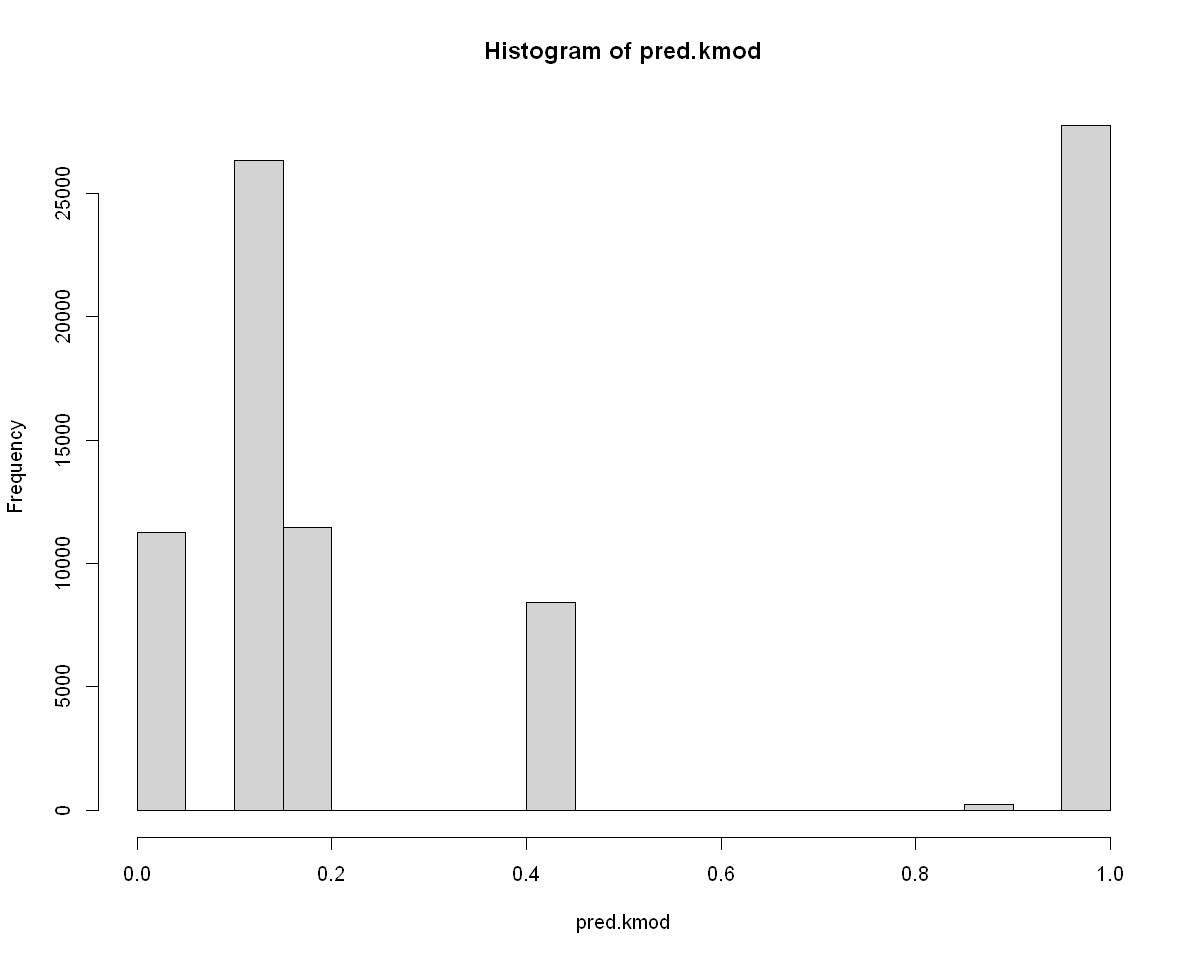

In [51]:
pred.kmod <- predict(mod.kmod,newdata=test,type="response")
hist(pred.kmod)
nrow(pred.kmod)

In [54]:
table(obs=test$Class)
table(pred=ifelse(pred.kmod>0.5,1,0))
table(obs=test$Class, pred=ifelse(pred.kmod>0.5,1,0))

obs
    0     1 
85298   145 

pred
    0     1 
57493 27950 

   pred
obs     0     1
  0 57482 27816
  1    11   134

In [57]:
### AUC
roc1 <- pROC::roc(test$Class, pred.kmod)
roc1


Setting levels: control = 0, case = 1

Warning message in roc.default(test$Class, pred.kmod):
"Deprecated use a matrix as predictor. Unexpected results may be produced, please pass a numeric vector."
Setting direction: controls < cases




Call:
roc.default(response = test$Class, predictor = pred.kmod)

Data: pred.kmod in 85298 controls (test$Class 0) < 145 cases (test$Class 1).
Area under the curve: 0.7992

In [40]:
#### k-means with 1000 clusters
kmod <- kmeans(train[,1:31],centers = 1000)
ktab <- data.frame(table(clust=kmod$cluster, class=train$Class))
ktab

Warning message:
"Quick-TRANSfer stage steps exceeded maximum (= 9968200)"


clust,class,Freq
<fct>,<fct>,<int>
1,0,237
2,0,315
3,0,56
4,0,197
5,0,273
6,0,254
7,0,196
8,0,21
9,0,275


In [34]:
#### select clusters having at least one minority class (1)
ktab %>% filter(class==1 & Freq >0) %>% select(clust) %>% tally()

n
<int>
217


In [35]:
clust <- ktab %>% filter(class==1 & Freq >0) %>% select(clust) 

In [36]:
train$cluster <- kmod$cluster

train2 <- train %>% filter(cluster %in% as.numeric(clust$clust))

In [37]:
summary(train2)
summary(kmod$centers)

      Time              V1                  V2                 V3           
 Min.   :   402   Min.   :-40.47014   Min.   :-38.4368   Min.   :-33.68098  
 1st Qu.: 48428   1st Qu.: -0.91665   1st Qu.: -0.5196   1st Qu.: -0.71862  
 Median : 78858   Median :  0.02396   Median :  0.1054   Median :  0.29135  
 Mean   : 89049   Mean   : -0.00270   Mean   :  0.1066   Mean   :  0.09007  
 3rd Qu.:139088   3rd Qu.:  1.28729   3rd Qu.:  0.8318   3rd Qu.:  1.10921  
 Max.   :170467   Max.   :  2.45189   Max.   : 19.1672   Max.   :  4.22611  
       V4                 V5                  V6                  V7           
 Min.   :-5.41631   Min.   :-23.66973   Min.   :-23.49671   Min.   :-37.06031  
 1st Qu.:-0.80737   1st Qu.: -0.67791   1st Qu.: -0.76051   1st Qu.: -0.58485  
 Median : 0.03668   Median : -0.07334   Median : -0.27130   Median : -0.00054  
 Mean   : 0.07009   Mean   :  0.00323   Mean   : -0.02189   Mean   : -0.09109  
 3rd Qu.: 0.81024   3rd Qu.:  0.58901   3rd Qu.:  0.37416   3

      Time                V1                 V2                  V3          
 Min.   :   190.1   Min.   :-36.8023   Min.   :-63.34470   Min.   :-48.3256  
 1st Qu.: 53627.0   1st Qu.: -0.4801   1st Qu.: -1.27736   1st Qu.: -0.7643  
 Median : 84747.4   Median : -0.1459   Median :  0.05154   Median : -0.5043  
 Mean   : 94789.1   Mean   : -0.6807   Mean   : -1.19966   Mean   : -0.5213  
 3rd Qu.:141170.7   3rd Qu.:  0.2660   3rd Qu.:  0.22567   3rd Qu.:  0.6694  
 Max.   :172650.8   Max.   :  1.2142   Max.   :  1.11963   Max.   :  1.2982  
       V4                 V5                  V6                 V7           
 Min.   :-1.20980   Min.   :-113.7433   Min.   :-0.74605   Min.   : -0.88012  
 1st Qu.:-0.15522   1st Qu.:  -0.5185   1st Qu.:-0.09999   1st Qu.: -0.14242  
 Median : 0.07495   Median :  -0.1634   Median : 0.01973   Median :  0.03004  
 Mean   : 0.26626   Mean   :  -0.7888   Mean   : 0.43132   Mean   :  0.82749  
 3rd Qu.: 0.24277   3rd Qu.:   0.3088   3rd Qu.: 0.28413   

In [41]:
train2$cluster <- NULL

In [42]:
#### run logistic regression model
mod4 <- glm(Class ~., data=train2, family="binomial")
summary(mod4)


Call:
glm(formula = Class ~ ., family = "binomial", data = train2)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-5.0083  -0.0486  -0.0306  -0.0186   4.2068  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -7.861e+00  3.547e-01 -22.164  < 2e-16 ***
Time        -7.659e-09  2.964e-06  -0.003 0.997938    
V1           1.116e-01  6.236e-02   1.789 0.073633 .  
V2           2.031e-01  1.014e-01   2.003 0.045185 *  
V3           2.517e-02  7.446e-02   0.338 0.735341    
V4           6.539e-01  1.022e-01   6.399 1.56e-10 ***
V5           1.671e-01  1.010e-01   1.655 0.097962 .  
V6          -2.385e-01  1.089e-01  -2.190 0.028509 *  
V7          -1.933e-01  1.052e-01  -1.838 0.066094 .  
V8          -2.101e-01  4.961e-02  -4.236 2.28e-05 ***
V9          -1.110e-01  1.527e-01  -0.727 0.467264    
V10         -5.606e-01  1.419e-01  -3.951 7.77e-05 ***
V11         -2.879e-02  1.107e-01  -0.260 0.794755    
V12          8.830e-02  1.103e-01

In [43]:
pred4 <- predict(mod4,newdata=test,type="response")

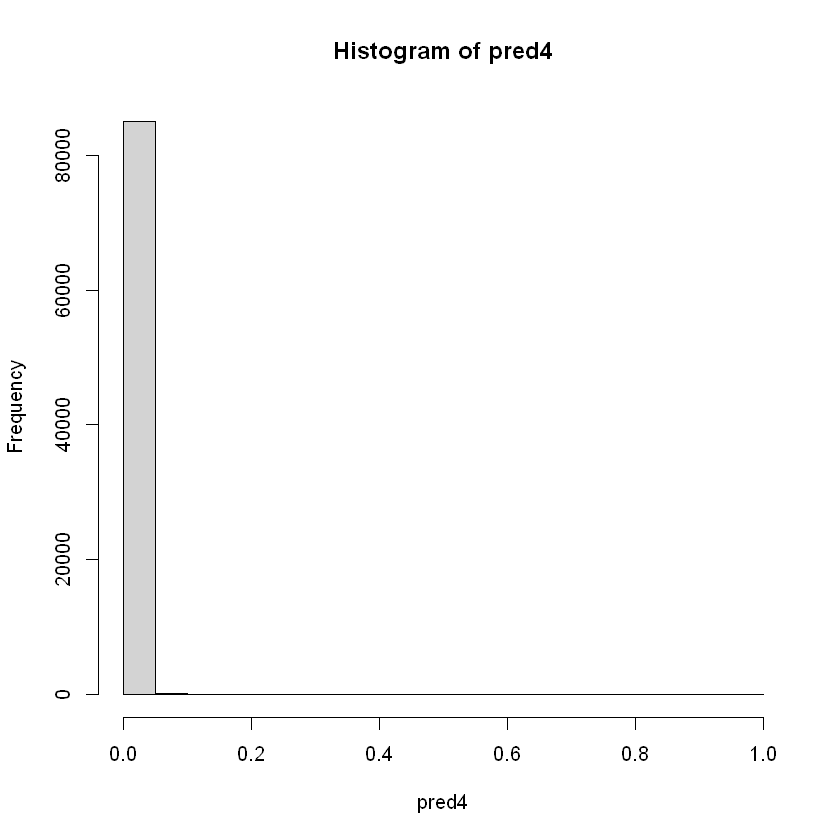

In [44]:
hist(pred4)

In [45]:
table(obs=test$Class, pred=ifelse(pred4>0.5,1,0))

   pred
obs     0     1
  0 85228    70
  1    49    96

In [51]:
### AUC
roc1 <- pROC::roc(test$Class, pred4)
roc1

Setting levels: control = 0, case = 1

Setting direction: controls < cases




Call:
roc.default(response = test$Class, predictor = pred4)

Data: pred4 in 85298 controls (test$Class 0) < 145 cases (test$Class 1).
Area under the curve: 0.9783

In [46]:
#### run random forest model
mod5 <- ranger::ranger(Class ~., data=train2)
mod5

Growing trees.. Progress: 74%. Estimated remaining time: 10 seconds.


Ranger result

Call:
 ranger::ranger(Class ~ ., data = train2) 

Type:                             Regression 
Number of trees:                  500 
Sample size:                      52361 
Number of independent variables:  30 
Mtry:                             5 
Target node size:                 5 
Variable importance mode:         none 
Splitrule:                        variance 
OOB prediction error (MSE):       0.001232496 
R squared (OOB):                  0.8127839 

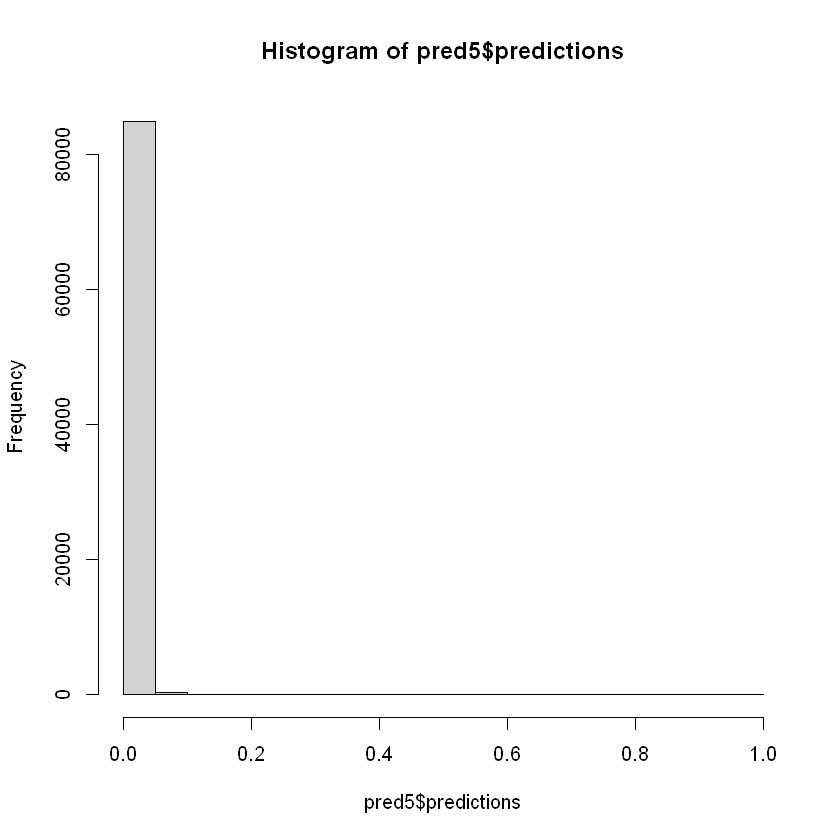

In [47]:
pred5 <- predict(mod5,data=test)
hist(pred5$predictions)

In [48]:
table(obs=test$Class, pred=ifelse(pred5$predictions>0.5,1,0))

   pred
obs     0     1
  0 85277    21
  1    34   111

In [52]:
### AUC
roc2 <- pROC::roc(test$Class, pred5$predictions)
roc2

Setting levels: control = 0, case = 1

Setting direction: controls < cases




Call:
roc.default(response = test$Class, predictor = pred5$predictions)

Data: pred5$predictions in 85298 controls (test$Class 0) < 145 cases (test$Class 1).
Area under the curve: 0.9567

   pred
obs      0      1
  0 284268     47
  1     38    454

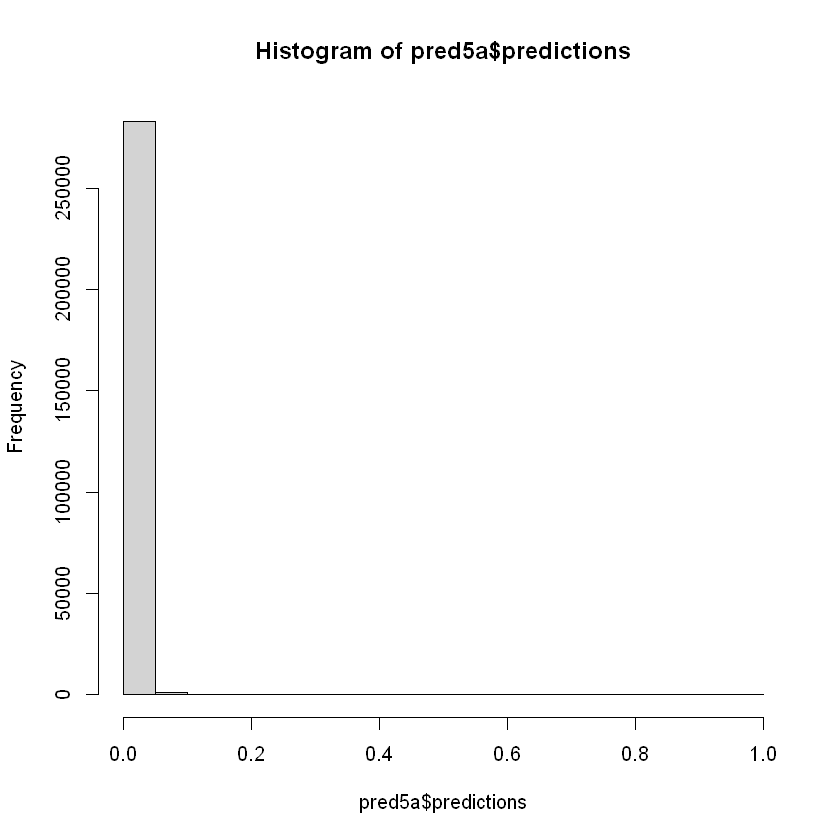

In [53]:
### Predict on whole dataset
pred5a <- predict(mod5,data=df)
hist(pred5a$predictions)
table(obs=df$Class, pred=ifelse(pred5a$predictions>0.5,1,0))

In [54]:
roc1 <- pROC::roc(df$Class, pred5a$predictions)
roc1

Setting levels: control = 0, case = 1

Setting direction: controls < cases




Call:
roc.default(response = df$Class, predictor = pred5a$predictions)

Data: pred5a$predictions in 284315 controls (df$Class 0) < 492 cases (df$Class 1).
Area under the curve: 0.9874